In [ ]:
import DataAug_misc as da
import keras
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
spath='/content/gdrive/My Drive/AudioFiles_wav1/Passer domesticus'
dpath="/content/gdrive/My Drive/Test/Corvus corax"

In [ ]:
model = keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/v2_8_Adam.h5')


wav0,sr=librosa.load('/content/gdrive/My Drive/AudioFiles_wav1/Corvus corax/Corvus corax_96.wav')
wav1,sr=librosa.load('/content/gdrive/My Drive/Colab Notebooks/Cyanistes caeruleus_3.wav')
wav2,sr=librosa.load('/content/gdrive/My Drive/AudioFiles_wav1/Parus major/Parus major_96.wav')

labels={0:'Corvus Corax',1:'Cuculus canorus',2:'Cyanistes caeruleus',3:'Parus major',4:'Passer domesticus'}

In [ ]:
wav1.shape

(2117330,)

In [ ]:
def plot_mfcc(mfccs):
  mfcc=np.array(mfccs)
  mfcc=np.squeeze(mfccs)
  print(mfcc.shape)
  plt.figure(figsize=(10,5))
  librosa.display.specshow(mfcc,x_axis='log',sr=sr)
  plt.show()

In [ ]:
def fin_pred(sigwav):
  mfccs=[]
  wavs = da.wav_split(sigwav)
  i=1
  for wav in wavs:
    mfcc = da.wav_to_mfcc(wav)
    #print(mfcc)
    print("Clip..{}".format(i))
    plot_mfcc(mfcc)
    mfccs.append(mfcc)
    mfcc=mfcc[np.newaxis,...]
    label=model.predict_classes(mfcc)
    print("Class predicted..."+labels[label[0]])
    i+=1
  
  mfccs = np.asarray(mfccs)
  #print(mfccs.shape)
  preds =np.argmax(model.predict(mfccs),axis=-1)
  return preds,len(wavs)

Predicting before Silence removal

Clip..1
(13, 517)


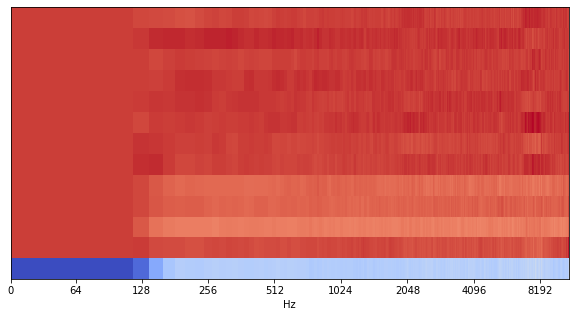

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Class predicted...Cyanistes caeruleus
Clip..2
(13, 517)


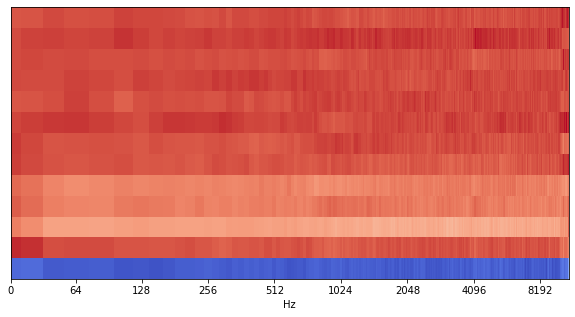

Class predicted...Cyanistes caeruleus
Clip..3
(13, 517)


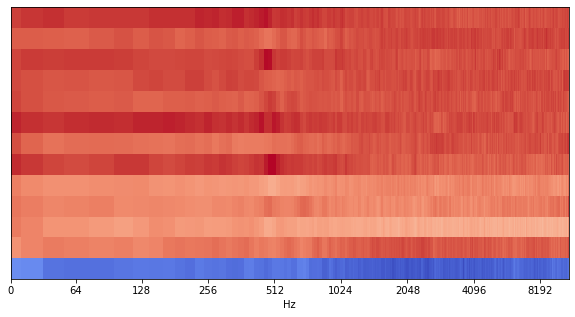

Class predicted...Cyanistes caeruleus
Clip..4
(13, 517)


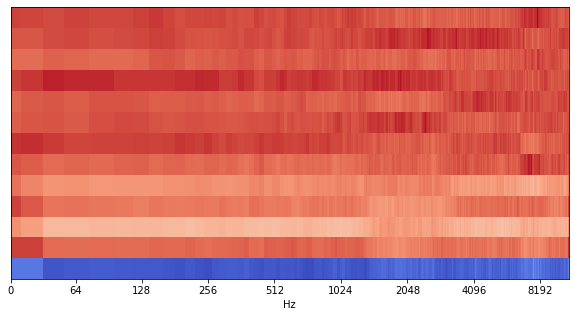

Class predicted...Parus major
Clip..5
(13, 517)


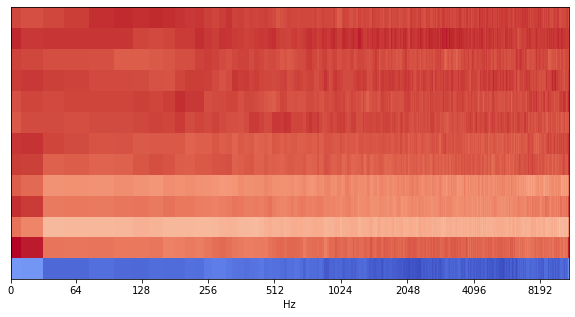

Class predicted...Cyanistes caeruleus
Clip..6
(13, 517)


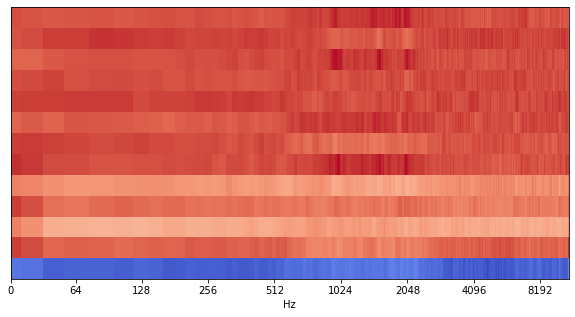

Class predicted...Cyanistes caeruleus
Clip..7
(13, 517)


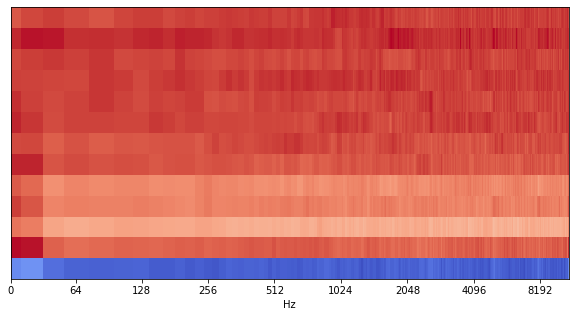

Class predicted...Cyanistes caeruleus
Clip..8
(13, 517)


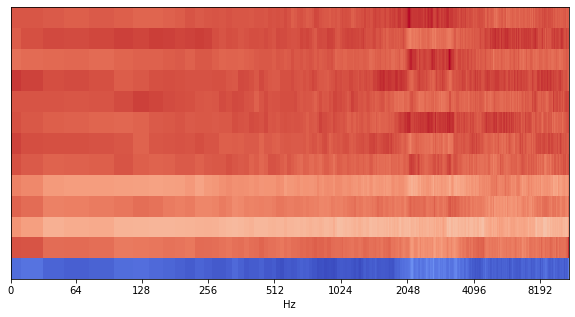

Class predicted...Cyanistes caeruleus
Clip..9
(13, 517)


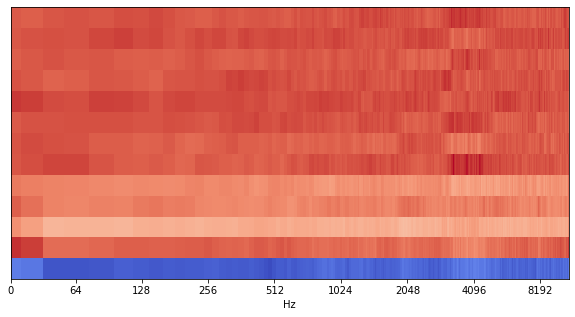

Class predicted...Cyanistes caeruleus
Clip..10
(13, 517)


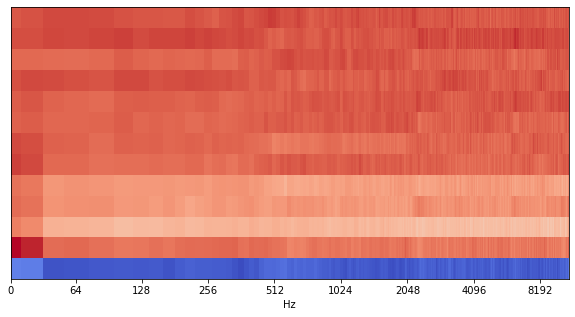

Class predicted...Cyanistes caeruleus
Clip..11
(13, 517)


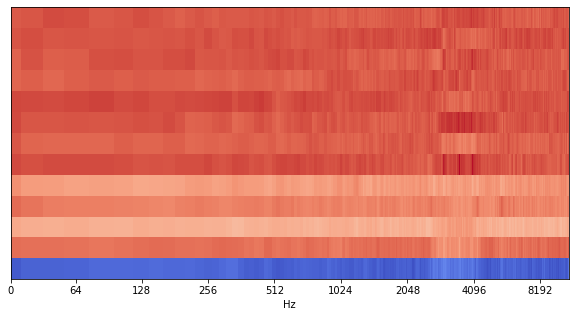

Class predicted...Cyanistes caeruleus
Clip..12
(13, 517)


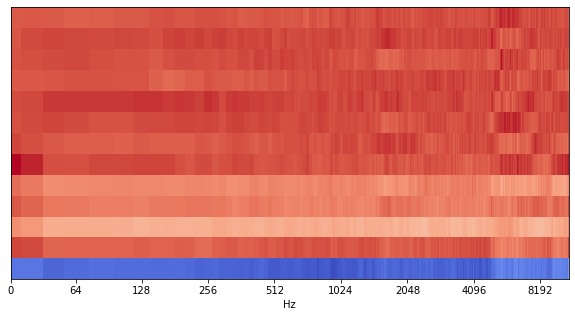

Class predicted...Cyanistes caeruleus
Clip..13
(13, 517)


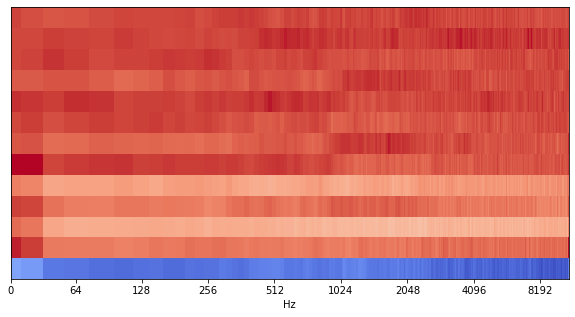

Class predicted...Cyanistes caeruleus
Clip..14
(13, 517)


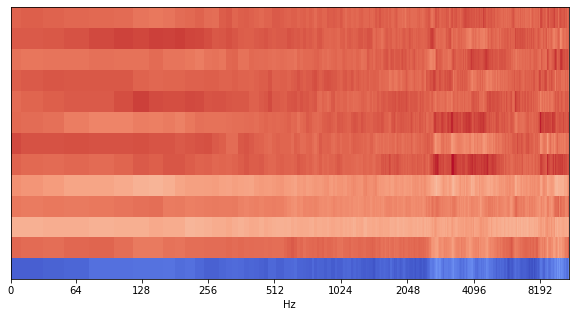

Class predicted...Cyanistes caeruleus
Clip..15
(13, 517)


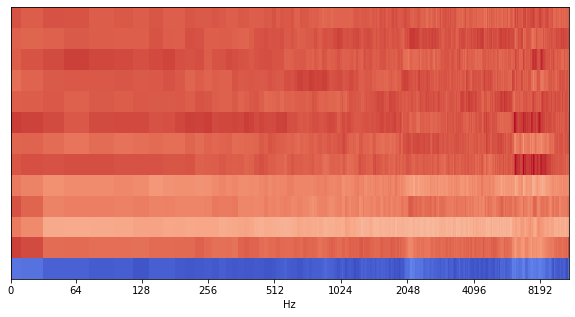

Class predicted...Cyanistes caeruleus
Clip..16
(13, 517)


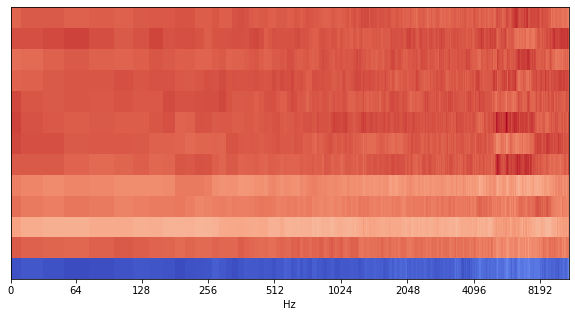

Class predicted...Cyanistes caeruleus
Clip..17
(13, 517)


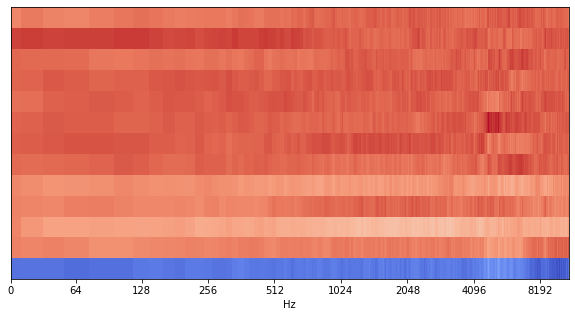

Class predicted...Cyanistes caeruleus
Clip..18
(13, 517)


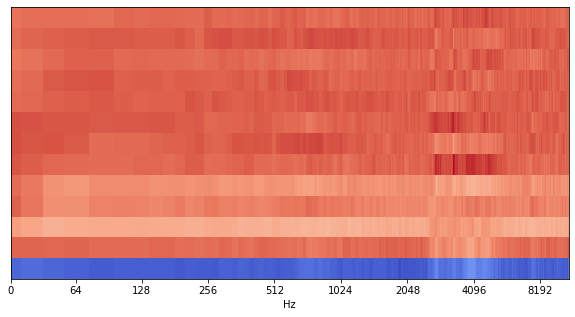

Class predicted...Cyanistes caeruleus
Clip..19
(13, 517)


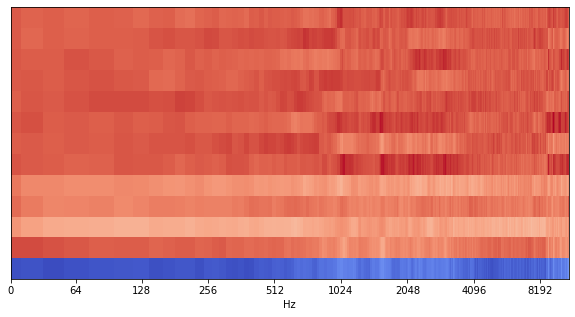

Class predicted...Cyanistes caeruleus
Clip..20
(13, 517)


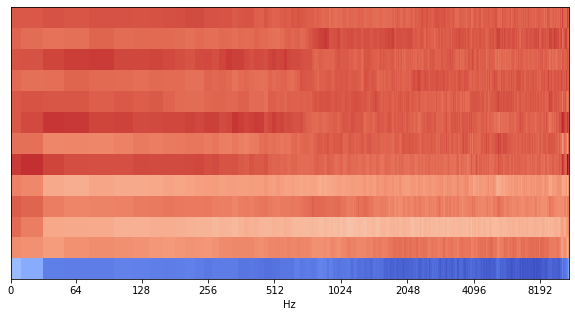

Class predicted...Cyanistes caeruleus
Clip..21
(13, 517)


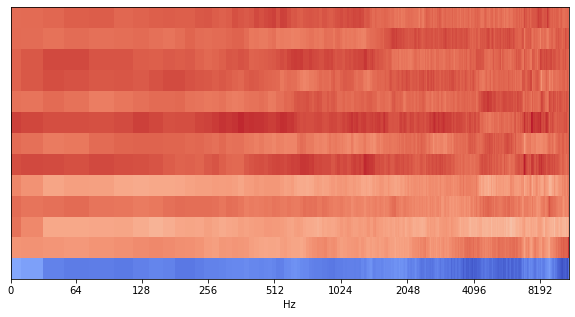

Class predicted...Cyanistes caeruleus
Clip..22
(13, 517)


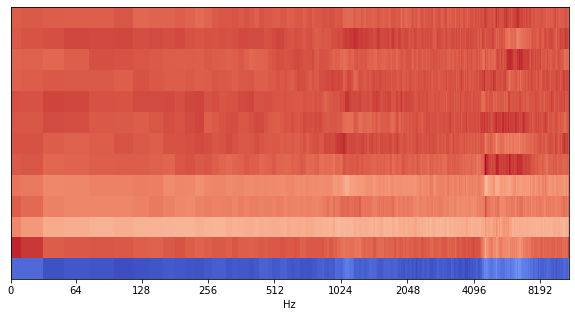

Class predicted...Cyanistes caeruleus
Clip..23
(13, 517)


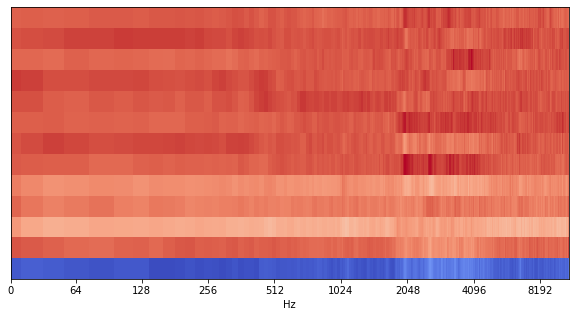

Class predicted...Cyanistes caeruleus
Clip..24
(13, 517)


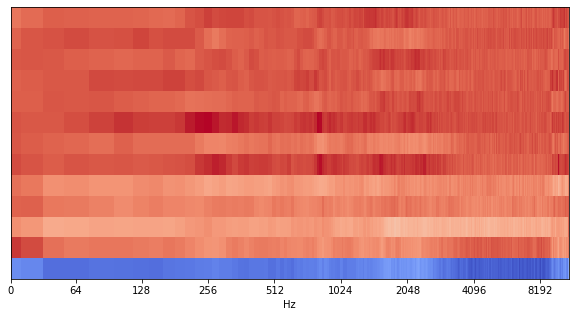

Class predicted...Cyanistes caeruleus
Clip..25
(13, 517)


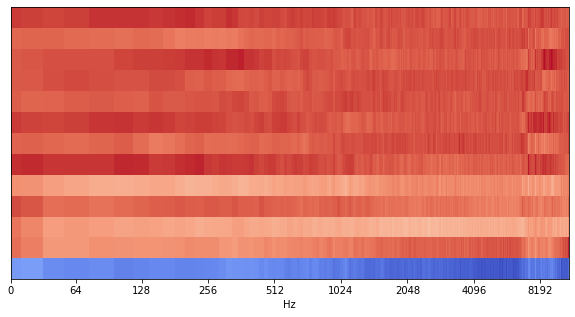

Class predicted...Cyanistes caeruleus
Clip..26
(13, 517)


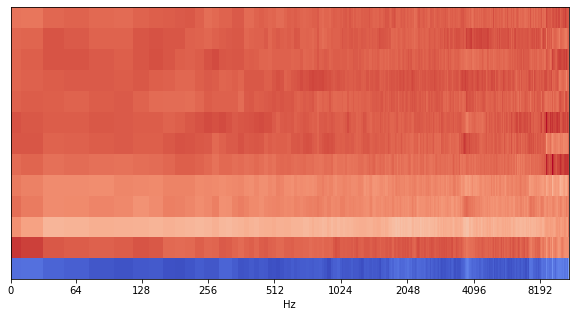

Class predicted...Cyanistes caeruleus
Clip..27
(13, 517)


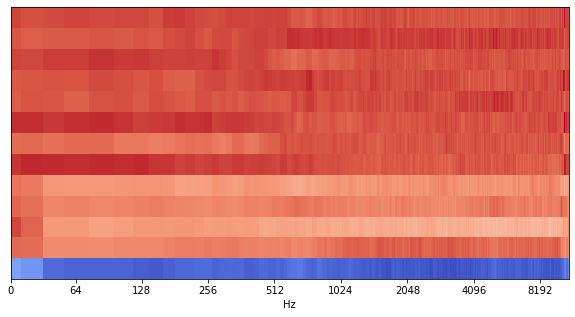

Class predicted...Cyanistes caeruleus
Clip..28
(13, 517)


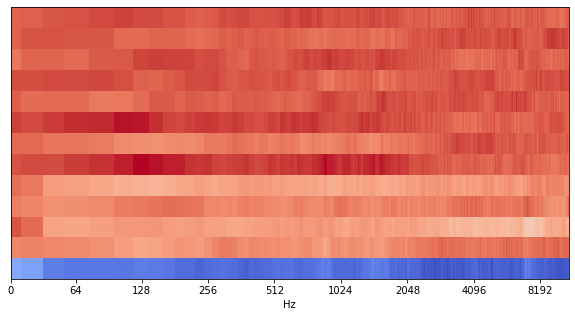

Class predicted...Cyanistes caeruleus
Clip..29
(13, 517)


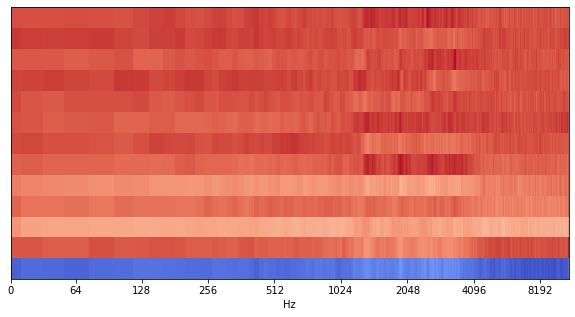

Class predicted...Cyanistes caeruleus
Clip..30
(13, 517)


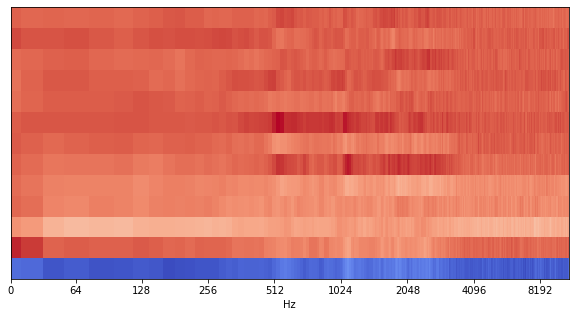

Class predicted...Cyanistes caeruleus
Clip..31
(13, 517)


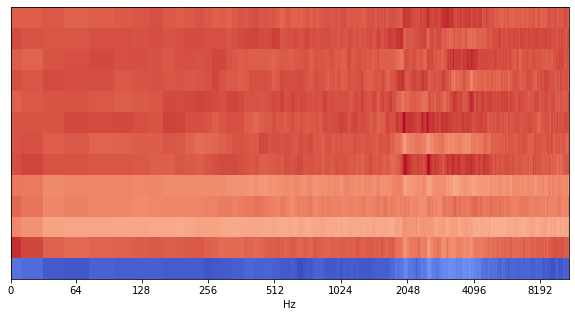

Class predicted...Cyanistes caeruleus
Clip..32
(13, 517)


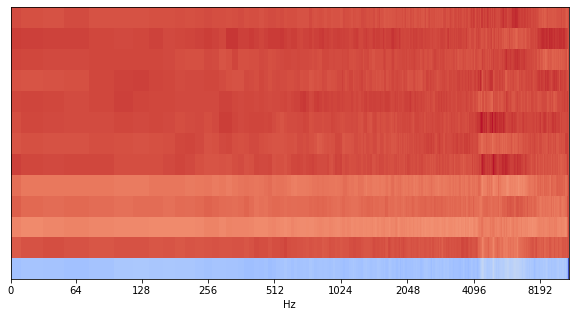

Class predicted...Cyanistes caeruleus
Clip..33
(13, 517)


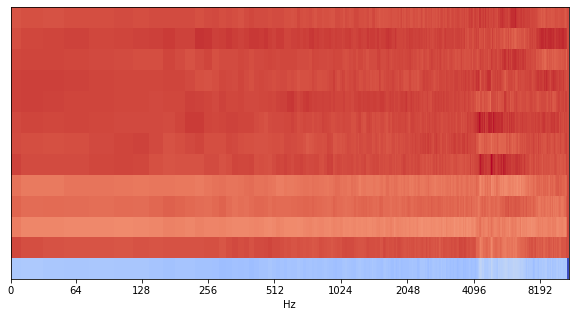

Class predicted...Cyanistes caeruleus
[2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Total no.of clips predicted...33
Counter({'Cyanistes caeruleus': 32, 'Parus major': 1})
Predicted bird is...Cyanistes caeruleus


In [ ]:
preds,wavs=fin_pred(wav1)
correct=[]
print(preds)
for pred in preds:
    class_name=labels[pred]
    correct.append(class_name)

f_pred=Counter(correct).most_common(1)[0][0]
print("Total no.of clips predicted...{}".format(wavs))
print(Counter(correct))
print("Predicted bird is..."+f_pred)


In [ ]:
sig_sec=librosa.effects.split(wav1,top_db=20)

In [ ]:
sig_sec.shape

(78, 2)

Waveplot(Amp vs Time)

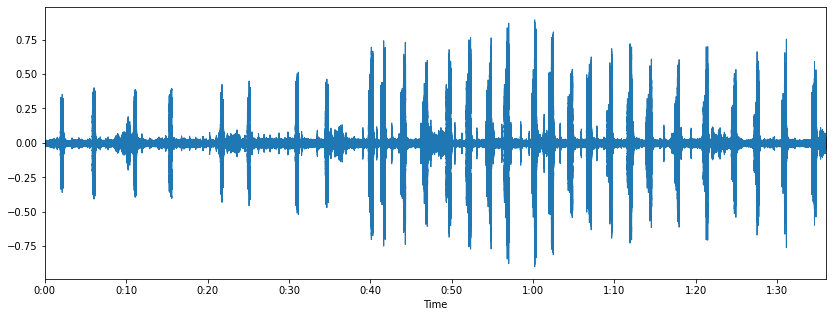

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(wav1, sr=sr)

Spectogram(without silence removal)

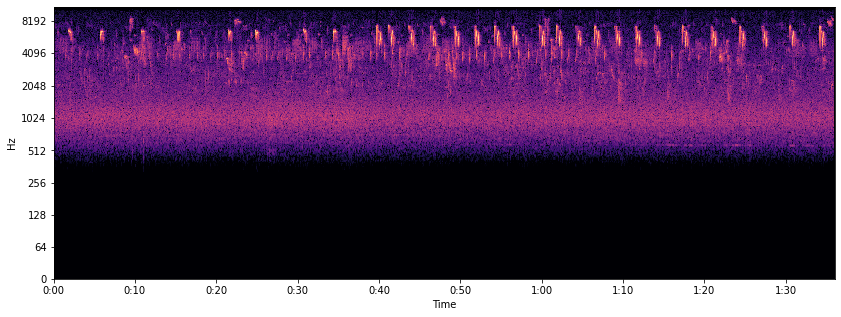

In [ ]:
spec = np.abs(librosa.stft(wav1,hop_length=512))
spec = librosa.amplitude_to_db(spec,ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')

Function to remove silence and return signal chunks
(ref-top_db is considered as Silence)

In [ ]:
def silence_removal(wav1,db_val=10):
    sig_sec=librosa.effects.split(y=wav1, top_db=db_val)
    print("sig_sec{}".format(sig_sec.shape))
    sigs=[]
    for s in sig_sec:
      l_ind,r_ind=s
      sig=wav1[l_ind:r_ind]
      sigs.extend(sig)
    sigs=np.asarray(sigs)
    spec = np.abs(librosa.stft(sigs,hop_length=512))
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
    return sigs

  

Execute here:

sig_sec(70, 2)


(197632,)

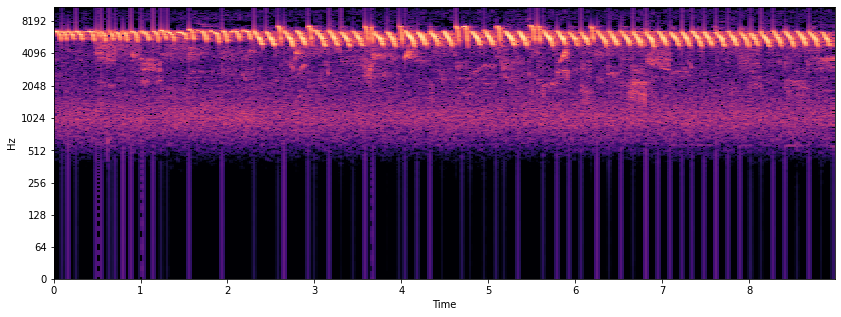

In [ ]:
sigs=silence_removal(wav1)
sigs.shape

Spectrogram after silence removal

Prediction after silence removal

Clip..1
(13, 517)


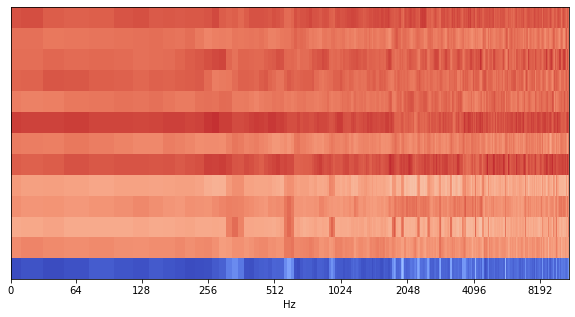

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Class predicted...Cyanistes caeruleus
Clip..2
(13, 517)


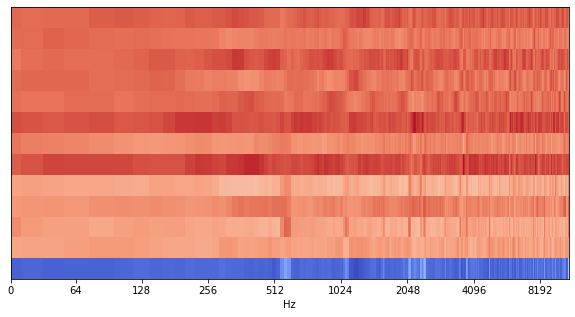

Class predicted...Parus major
Clip..3
(13, 517)


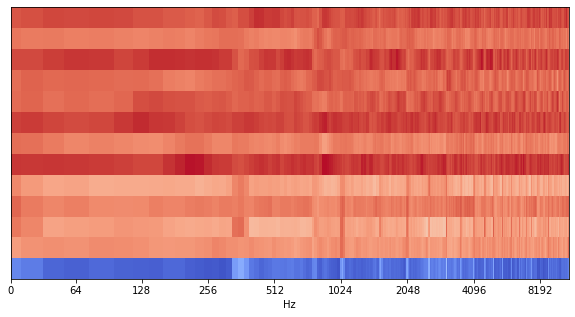

Class predicted...Cyanistes caeruleus
[2 3 2]
Total no.of clips predicted...3
Counter({'Cyanistes caeruleus': 2, 'Parus major': 1})
Predicted bird is...Cyanistes caeruleus


In [ ]:
preds,wavs=fin_pred(sigs)
correct=[]
print(preds)
for pred in preds:
    class_name=labels[pred]
    correct.append(class_name)

f_pred=Counter(correct).most_common(1)[0][0]
print("Total no.of clips predicted...{}".format(wavs))
print(Counter(correct))
print("Predicted bird is..."+f_pred)

In [ ]:
  # dictionary to store mapping, labels, and MFCCs
  data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
  }


In [ ]:

#wav1=np.random.random(1000000) * 100
S=np.abs(librosa.stft(wav0))
wav_db=librosa.power_to_db(S**2,ref=S.min())
wav_db.max()

114.95671

In [ ]:
def fin_pred1(data,sigwav,label):
  i=0
  print("wav_shape{}".format(sigwav.shape))
  sig=silence_removal(sigwav)
  print("sig_shape{}".format(sig.shape))
  wavs = da.wav_split(sig)
  print(len(wavs))
  #samples per segment is constant (SAMPLE_RATE*chunk size i.e 22050*3=66150)
  #samples_per_segment = SAMPLE_RATE * 3
  #num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
  for wav in wavs:
    mfcc = da.wav_to_mfcc(wav)
    print(mfcc.shape)
   # print("Clip..{}".format(i))
    data['mfcc'].append(mfcc.tolist())
    data['labels'].append(label)
    data['mapping'].append(labels[label])
    print(len(data['mfcc']))
    i+=1



In [ ]:
for files in os.listdir(spath):
  fpath=os.path.join(spath,files)
  #print(fpath)
  sig,sr=librosa.load(fpath)
  fin_pred1(data,sig,4)

wav_shape(234064,)
sig_sec(11, 2)
sig_shape(49664,)
0
wav_shape(1359708,)
sig_sec(8, 2)
sig_shape(19456,)
0
wav_shape(160767,)
sig_sec(9, 2)
sig_shape(24064,)
0
wav_shape(179677,)
sig_sec(6, 2)
sig_shape(15360,)
0
wav_shape(690048,)
sig_sec(21, 2)
sig_shape(52736,)
0
wav_shape(287721,)
sig_sec(17, 2)
sig_shape(50688,)
0
wav_shape(6224384,)
sig_sec(86, 2)
sig_shape(164352,)
3
(13, 517, 1)
850
(13, 517, 1)
851
(13, 517, 1)
852
wav_shape(1247040,)
sig_sec(15, 2)
sig_shape(36864,)
0
wav_shape(4764388,)
sig_sec(198, 2)
sig_shape(395776,)
6
(13, 517, 1)
853
(13, 517, 1)
854
(13, 517, 1)
855
(13, 517, 1)
856
(13, 517, 1)
857
(13, 517, 1)
858
wav_shape(203209,)
sig_sec(12, 2)
sig_shape(53248,)
0
wav_shape(1340688,)
sig_sec(9, 2)
sig_shape(20992,)
0
wav_shape(1948940,)
sig_sec(79, 2)
sig_shape(168960,)
3
(13, 517, 1)
859
(13, 517, 1)
860
(13, 517, 1)
861
wav_shape(202298,)
sig_sec(4, 2)
sig_shape(17920,)
0
wav_shape(410585,)
sig_sec(10, 2)
sig_shape(35840,)
0
wav_shape(471348,)
sig_sec(20, 2)
s

In [ ]:
np.array(data['mfcc']).shape

(1090, 13, 517, 1)

In [ ]:
 #save MFCCs to npz file
npz_path="/content/gdrive/My Drive/5_final_test_split10.npz"
with open(npz_path, "wb") as fp:
       # json.dump(data, fp, indent=4)
       mappings=np.array(data["mapping"])
       labels=np.array(data["labels"])
       mfcc=np.array(data["mfcc"])
       np.savez_compressed(fp,mappings=mappings,labels=labels,mfcc=mfcc)
     
print("shape of MFCC:{}".format(np.array(data["mfcc"]).shape))

shape of MFCC:(1090, 13, 517, 1)
